In [97]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

orders_df = pd.read_csv('Olist/olist_orders_dataset.csv')
customers_df = pd.read_csv('Olist/olist_customers_dataset.csv')

# 날짜 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')

# orders와 customers 결합
orders_customers = orders_df.merge(customers_df[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

print("=" * 80)
print("데이터 기본 정보")
print("=" * 80)
print(f"총 주문 수: {len(orders_df):,}개")
print(f"총 고객 수 (customer_id): {orders_df['customer_id'].nunique():,}명")
print(f"총 고객 수 (customer_unique_id): {orders_customers['customer_unique_id'].nunique():,}명")
print("=" * 80)


데이터 기본 정보
총 주문 수: 99,441개
총 고객 수 (customer_id): 99,441명
총 고객 수 (customer_unique_id): 96,096명


#### 참고
- Pandas에서는 datetime 타입의 컬럼끼리 뺄셈 연산(-)을 하면, 그 결과로 Timedelta 라는 타입이 반환됨
    - 2023-10-05 - 2023-10-01 = 4 days

- dt.days : Timedelta 객체에서 Day 정보만 정수형태로 추출
    - 4 days라는 객체가 숫자 4로 변환

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

items_df = pd.read_csv('Olist/olist_order_items_dataset.csv')
sellers_df = pd.read_csv('Olist/olist_sellers_dataset.csv')

# items와 orders 결합 (판매자별 주문 날짜 확인)
items_orders = items_df.merge(
    orders_df[['order_id', 'order_purchase_timestamp', 'order_status']], 
    on='order_id', 
    how='left'
)

print("=" * 80)
print("판매자 기본 통계")
print("=" * 80)

# 판매자별 주문 통계
seller_order_stats = items_orders.groupby('seller_id').agg({
    'order_id': 'count',
    'order_purchase_timestamp': ['min', 'max']
}).reset_index()
seller_order_stats.columns = ['seller_id', 'order_count', 'first_order', 'last_order']

print(f"\n총 판매자 수: {len(seller_order_stats):,}명")
print(f"1회만 판매한 판매자: {(seller_order_stats['order_count'] == 1).sum():,}명 ({(seller_order_stats['order_count'] == 1).sum()/len(seller_order_stats)*100:.1f}%)")
print(f"2회 이상 판매한 판매자: {(seller_order_stats['order_count'] > 1).sum():,}명 ({(seller_order_stats['order_count'] > 1).sum()/len(seller_order_stats)*100:.1f}%)")

print("\n판매 수별 판매자 분포:")
order_count_dist = seller_order_stats['order_count'].value_counts().sort_index()
for count, num_sellers in order_count_dist.head(15).items():
    print(f"  {count}회 판매: {num_sellers:,}명 ({num_sellers/len(seller_order_stats)*100:.1f}%)")

print("\n판매 수 통계:")
print(f"  mean: {seller_order_stats['order_count'].mean():.1f}")
print(f"  median: {seller_order_stats['order_count'].median():.0f}")
print(f"  25%: {seller_order_stats['order_count'].quantile(0.25):.0f}")
print(f"  75%: {seller_order_stats['order_count'].quantile(0.75):.0f}")
print(f"  95%: {seller_order_stats['order_count'].quantile(0.95):.0f}")
print(f"  최대: {seller_order_stats['order_count'].max():.0f}")

print("=" * 80)


판매자 기본 통계

총 판매자 수: 3,095명
1회만 판매한 판매자: 509명 (16.4%)
2회 이상 판매한 판매자: 2,586명 (83.6%)

판매 수별 판매자 분포:
  1회 판매: 509명 (16.4%)
  2회 판매: 328명 (10.6%)
  3회 판매: 212명 (6.8%)
  4회 판매: 152명 (4.9%)
  5회 판매: 142명 (4.6%)
  6회 판매: 99명 (3.2%)
  7회 판매: 101명 (3.3%)
  8회 판매: 96명 (3.1%)
  9회 판매: 75명 (2.4%)
  10회 판매: 70명 (2.3%)
  11회 판매: 82명 (2.6%)
  12회 판매: 70명 (2.3%)
  13회 판매: 45명 (1.5%)
  14회 판매: 52명 (1.7%)
  15회 판매: 38명 (1.2%)

판매 수 통계:
  mean: 36.4
  median: 8
  25%: 2
  75%: 24
  95%: 147
  최대: 2033


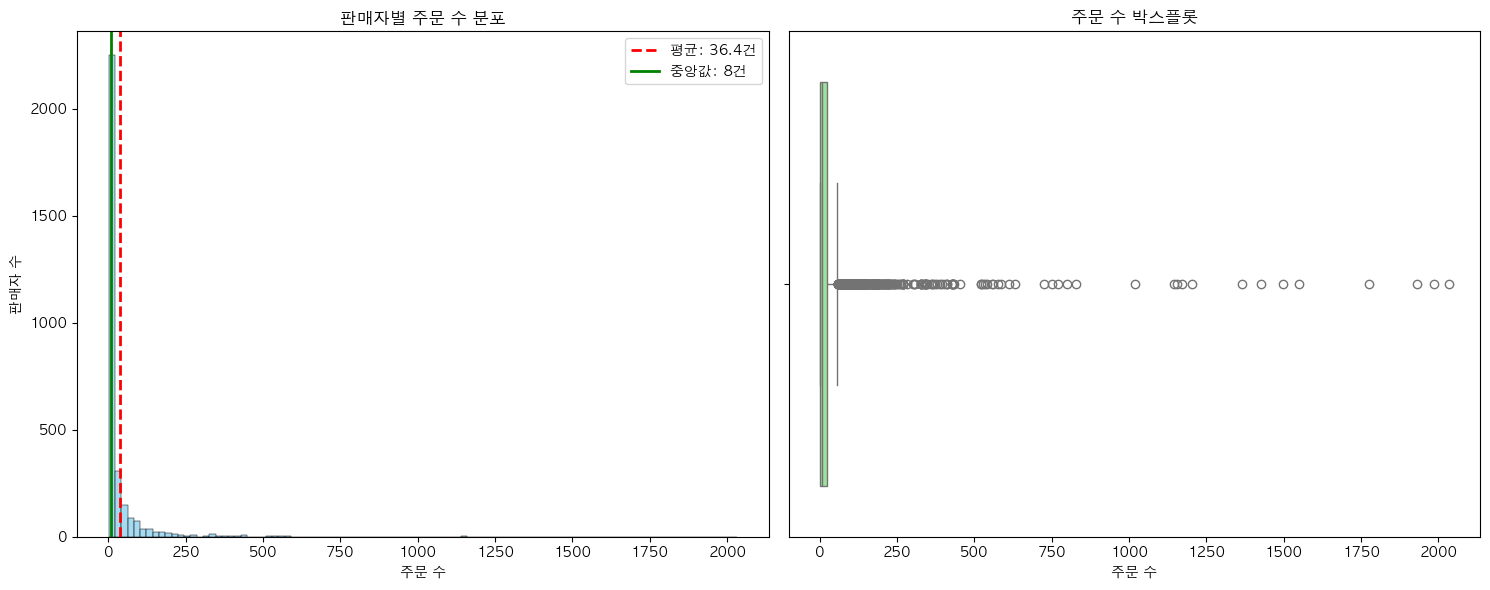

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=seller_order_stats, x='order_count', bins=100, ax=axes[0], color='skyblue')

axes[0].set_title('판매자별 주문 수 분포')
axes[0].set_xlabel('주문 수')
axes[0].set_ylabel('판매자 수')

mean_val = seller_order_stats['order_count'].mean()
median_val = seller_order_stats['order_count'].median()

axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'평균: {mean_val:.1f}건')
axes[0].axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'중앙값: {median_val:.0f}건')
axes[0].legend()

sns.boxplot(x=seller_order_stats['order_count'], ax=axes[1], color='lightgreen')

axes[1].set_title('주문 수 박스플롯')
axes[1].set_xlabel('주문 수')

plt.tight_layout()
plt.show()

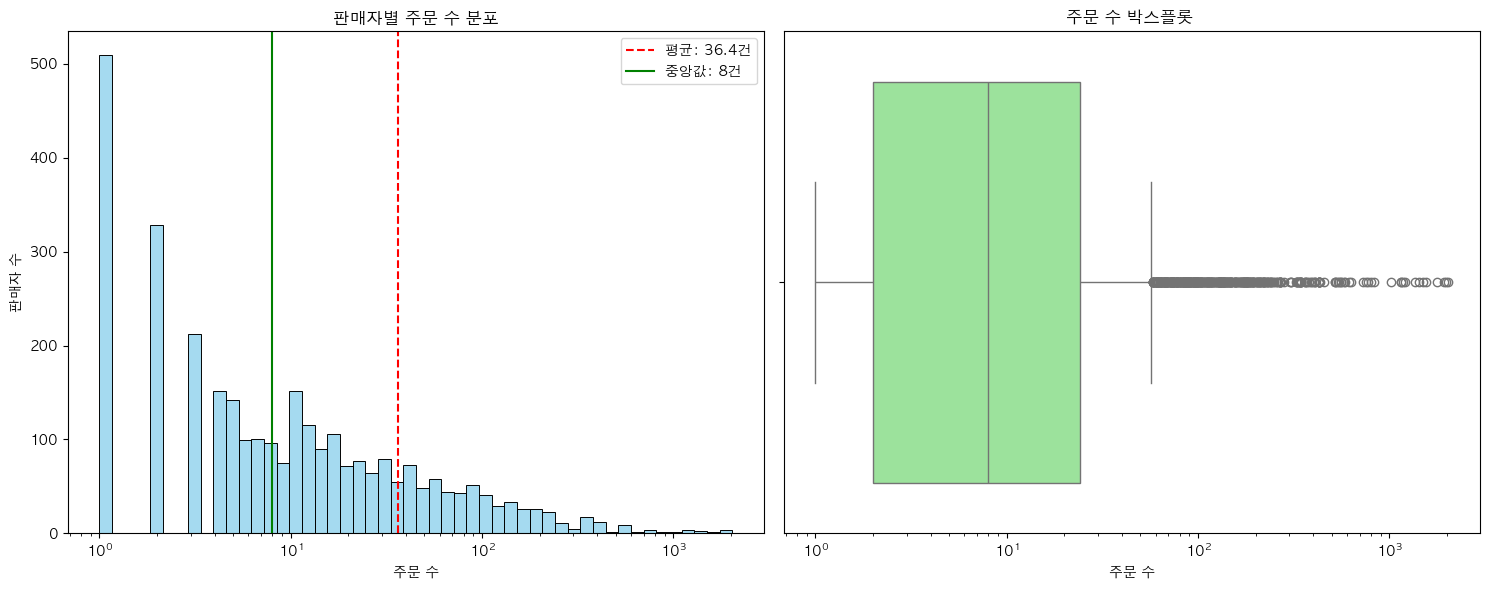

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=seller_order_stats, x='order_count', bins=50, log_scale=True, ax=axes[0], color='skyblue')

axes[0].set_title('판매자별 주문 수 분포')
axes[0].set_xlabel('주문 수')
axes[0].set_ylabel('판매자 수')

mean_val = seller_order_stats['order_count'].mean()
median_val = seller_order_stats['order_count'].median()

axes[0].axvline(mean_val, color='red', linestyle='--', label=f'평균: {mean_val:.1f}건')
axes[0].axvline(median_val, color='green', linestyle='-', label=f'중앙값: {median_val:.0f}건')
axes[0].legend()

sns.boxplot(x=seller_order_stats['order_count'], ax=axes[1], color='lightgreen')
axes[1].set_xscale('log') 

axes[1].set_title('주문 수 박스플롯 ')
axes[1].set_xlabel('주문 수')

plt.tight_layout()
plt.show()

#### 참고
- 운영 기간 분석은 제외
    - 첫 주문일을 기준으로 운영 기간을 계산하는 것은 부정확하다고 판단됨
- 대신 주문 수, 매출 규모, 리뷰 점수 등 다른 지표로 판매자를 분류하는 것이 더 정확할 것 같음

In [101]:
# 판매 수 기준 판매자 분류 (분위수 기반, 1회 판매 제외)
print("=" * 80)
print("판매 수 기준 판매자 분류")
print("=" * 80)

# 1회 판매 제외 (2회 이상 판매한 판매자만)
seller_order_active = seller_order_stats[seller_order_stats['order_count'] > 1].copy()

# 판매 수 분위수 확인
print("\n판매 수 분위수 (1회 판매 제외):")
print(f"  25%: {seller_order_active['order_count'].quantile(0.25):.0f}건")
print(f"  50%: {seller_order_active['order_count'].quantile(0.50):.0f}건")
print(f"  75%: {seller_order_active['order_count'].quantile(0.75):.0f}건")
print(f"  90%: {seller_order_active['order_count'].quantile(0.90):.0f}건")
print(f"  95%: {seller_order_active['order_count'].quantile(0.95):.0f}건")
print(f"  99%: {seller_order_active['order_count'].quantile(0.99):.0f}건")

q25 = seller_order_active['order_count'].quantile(0.25)
q50 = seller_order_active['order_count'].quantile(0.50)
q75 = seller_order_active['order_count'].quantile(0.75)
q90 = seller_order_active['order_count'].quantile(0.90)

bins = [0, q25, q50, q75, q90, float('inf')]

labels = [
    '하위 25% (소규모)',
    '25-50% (소중규모)',
    '50-75% (중소)',
    '75-90% (중규모)',
    '상위 10% (대규모)'
]

seller_order_active['order_category_quantile'] = pd.cut(
    seller_order_active['order_count'],
    bins=bins,
    labels=labels,
    right=False
)

print(f"\n분석 대상 판매자 수: {len(seller_order_active):,}명 (1회 판매 제외)")

print("\n판매 수 기준 판매자 분포 :")
order_category_dist = seller_order_active['order_category_quantile'].value_counts().sort_index()
for category, count in order_category_dist.items():
    ratio = count / len(seller_order_active) * 100
    print(f"  {category}: {count:,}명 ({ratio:.1f}%)")

print("\n카테고리별 평균 판매 수:")
category_order_avg = seller_order_active.groupby('order_category_quantile')['order_count'].mean()
for category, avg in category_order_avg.items():
    print(f"  {category}: {avg:.1f}건")

print("=" * 80)


판매 수 기준 판매자 분류

판매 수 분위수 (1회 판매 제외):
  25%: 4건
  50%: 11건
  75%: 32건
  90%: 95건
  95%: 173건
  99%: 530건

분석 대상 판매자 수: 2,586명 (1회 판매 제외)

판매 수 기준 판매자 분포 :
  하위 25% (소규모): 540명 (20.9%)
  25-50% (소중규모): 735명 (28.4%)
  50-75% (중소): 657명 (25.4%)
  75-90% (중규모): 393명 (15.2%)
  상위 10% (대규모): 261명 (10.1%)

카테고리별 평균 판매 수:
  하위 25% (소규모): 2.4건
  25-50% (소중규모): 6.5건
  50-75% (중소): 18.0건
  75-90% (중규모): 55.1건
  상위 10% (대규모): 278.1건


/var/folders/3b/mp7mjwzj0y38km8nrsylgq180000gn/T/ipykernel_24292/1124197717.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_order_avg = seller_order_active.groupby('order_category_quantile')['order_count'].mean()


In [107]:
print("=" * 80)
print("월별 주문 수 기준 판매자 분류")
print("=" * 80)

# 2회 이상 판매한 판매자 필터링
active_sellers = seller_order_stats[seller_order_stats['order_count'] > 1].copy()

# 월별 데이터 생성 및 불완전한 월 제외 로직 
items_orders['order_year_month'] = items_orders['order_purchase_timestamp'].dt.to_period('M')
monthly_order_counts = items_orders.groupby('order_year_month').size()

# 100건 미만인 월은 데이터가 충분치 않다고 판단하여 제외
min_orders_per_month = 100
incomplete_months = monthly_order_counts[monthly_order_counts < min_orders_per_month].index.tolist()

# 판매자별 월별 주문 수 계산
seller_monthly_orders = items_orders.groupby(['seller_id', 'order_year_month']).size().reset_index(name='monthly_orders')

# 불완전한 월 제외
seller_monthly_orders = seller_monthly_orders[~seller_monthly_orders['order_year_month'].isin(incomplete_months)]

# 판매자별 월평균 주문 수 계산
seller_monthly_avg = seller_monthly_orders.groupby('seller_id')['monthly_orders'].mean().reset_index()
seller_monthly_avg.columns = ['seller_id', 'avg_monthly_orders']

active_sellers = active_sellers.merge(seller_monthly_avg, on='seller_id', how='left')

# 월평균 주문 수 분위수 확인
print("\n월평균 주문 수 분위수:")
print(f"  25%: {active_sellers['avg_monthly_orders'].quantile(0.25):.2f}건/월")
print(f"  50%: {active_sellers['avg_monthly_orders'].quantile(0.50):.2f}건/월")
print(f"  75%: {active_sellers['avg_monthly_orders'].quantile(0.75):.2f}건/월")
print(f"  90%: {active_sellers['avg_monthly_orders'].quantile(0.90):.2f}건/월")
print(f"  95%: {active_sellers['avg_monthly_orders'].quantile(0.95):.2f}건/월")
print(f"  99%: {active_sellers['avg_monthly_orders'].quantile(0.99):.2f}건/월")

# 분위수 기반으로 기준점 설정
q25 = active_sellers['avg_monthly_orders'].quantile(0.25)
q50 = active_sellers['avg_monthly_orders'].quantile(0.50)
q75 = active_sellers['avg_monthly_orders'].quantile(0.75)
q90 = active_sellers['avg_monthly_orders'].quantile(0.90)

# pd.cut을 사용하여 분류
bins = [0, q25, q50, q75, q90, float('inf')]

labels = [
    '하위 25% (소규모)',
    '25-50% (소중규모)',
    '50-75% (중소)',
    '75-90% (중규모)',
    '상위 10% (대규모)'
]

active_sellers['order_category'] = pd.cut(
    active_sellers['avg_monthly_orders'], 
    bins=bins, 
    labels=labels, 
    right=False 
)

print(f"\n분석 대상 판매자 수: {len(active_sellers):,}명 (1회 판매 제외)")

print("\n월평균 주문 수 기준 판매자 분포 (분위수 기반):")
order_category_dist = active_sellers['order_category'].value_counts().sort_index()

for category, count in order_category_dist.items():
    ratio = count / len(active_sellers) * 100
    print(f"  {category}: {count:,}명 ({ratio:.1f}%)")

print("\n카테고리별 평균 월평균 주문 수:")
category_monthly_avg = active_sellers.groupby('order_category')['avg_monthly_orders'].mean()
for category, avg in category_monthly_avg.items():
    print(f"  {category}: {avg:.2f}건/월")

print("=" * 80)

월별 주문 수 기준 판매자 분류

월평균 주문 수 분위수:
  25%: 1.67건/월
  50%: 2.50건/월
  75%: 4.43건/월
  90%: 8.68건/월
  95%: 14.81건/월
  99%: 36.87건/월

분석 대상 판매자 수: 2,586명 (1회 판매 제외)

월평균 주문 수 기준 판매자 분포 (분위수 기반):
  하위 25% (소규모): 630명 (24.4%)
  25-50% (소중규모): 647명 (25.0%)
  50-75% (중소): 659명 (25.5%)
  75-90% (중규모): 391명 (15.1%)
  상위 10% (대규모): 259명 (10.0%)

카테고리별 평균 월평균 주문 수:
  하위 25% (소규모): 1.22건/월
  25-50% (소중규모): 2.01건/월
  50-75% (중소): 3.23건/월
  75-90% (중규모): 6.08건/월
  상위 10% (대규모): 21.32건/월


/var/folders/3b/mp7mjwzj0y38km8nrsylgq180000gn/T/ipykernel_24292/3535848386.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_monthly_avg = active_sellers.groupby('order_category')['avg_monthly_orders'].mean()


#### 참고
- **pd.cut**
- 기본 구조 :
 </br>`pd.cut(x, bins, labels=None, right=True, include_lowest=False)`
    - x: 나눌 데이터 (보통 컬럼 하나)
    - bins: 구간의 경계값 리스트 (예: [0, 10, 20, 100])
    - labels: 각 구간의 이름 리스트 (옵션)
    - right: 구간의 오른쪽 포함 여부 = 이상 or 초과 (기본값 True)
    - include_lowest: 첫 번째 구간의 왼쪽 경계값 포함 여부
    - pd.cut을 쓰면 자동으로 'Categorical' 타입이 되어 정렬 순서가 보장된다!
    - 따라서 .reindex()를 안 써도 sort_index()만으로 순서대로 나온다~~


In [104]:
# 매출 규모(Revenue) 분석
print("=" * 80)
print("매출 규모 분석")
print("=" * 80)

items_df = pd.read_csv('Olist/olist_order_items_dataset.csv')

items_with_orders = items_df.merge(
    orders_df[['order_id', 'order_status', 'order_purchase_timestamp']],
    on='order_id',
    how='left'
)

# delivered 주문만 사용
delivered_items = items_with_orders[items_with_orders['order_status'] == 'delivered'].copy()

# 총 매출액 계산 (price + freight_value)
delivered_items['total_revenue'] = delivered_items['price'] + delivered_items['freight_value']

# 판매자별 매출 통계
seller_revenue_stats = delivered_items.groupby('seller_id').agg({
    'total_revenue': 'sum',
    'price': 'mean',
    'order_id': 'count'
}).reset_index()
seller_revenue_stats.columns = ['seller_id', 'total_revenue', 'avg_order_value', 'order_count']

print(f"\n분석 대상 판매자 수: {len(seller_revenue_stats):,}")

print("\n총 매출액 통계:")
print(f"  평균: BRL {seller_revenue_stats['total_revenue'].mean():,.2f}")
print(f"  중앙값: BRL {seller_revenue_stats['total_revenue'].median():,.2f}")
print(f"  25%: BRL {seller_revenue_stats['total_revenue'].quantile(0.25):,.2f}")
print(f"  75%: BRL {seller_revenue_stats['total_revenue'].quantile(0.75):,.2f}")
print(f"  90%: BRL {seller_revenue_stats['total_revenue'].quantile(0.90):,.2f}")
print(f"  95%: BRL {seller_revenue_stats['total_revenue'].quantile(0.95):,.2f}")
print(f"  99%: BRL {seller_revenue_stats['total_revenue'].quantile(0.99):,.2f}")
print(f"  최대: BRL {seller_revenue_stats['total_revenue'].max():,.2f}")

print("\n판매물품 금액 통계:")
print(f"  평균: BRL {seller_revenue_stats['avg_order_value'].mean():,.2f}")
print(f"  중앙값: BRL {seller_revenue_stats['avg_order_value'].median():,.2f}")

print("=" * 80)


매출 규모 분석

분석 대상 판매자 수: 2,970

총 매출액 통계:
  평균: BRL 5,191.84
  중앙값: BRL 1,038.62
  25%: BRL 281.58
  75%: BRL 4,158.54
  90%: BRL 11,537.17
  95%: BRL 19,253.05
  99%: BRL 61,197.26
  최대: BRL 247,007.06

판매물품 금액 통계:
  평균: BRL 177.65
  중앙값: BRL 95.56


In [105]:
# 월평균 매출 계산 
print("=" * 80)
print("월평균 매출 분석")
print("=" * 80)

delivered_items['order_year_month'] = delivered_items['order_purchase_timestamp'].dt.to_period('M')

monthly_order_counts = delivered_items.groupby('order_year_month').size()
min_orders_per_month = 100
complete_months = monthly_order_counts[monthly_order_counts >= min_orders_per_month].index.tolist()

# 각 판매자의 월별 매출 계산
seller_monthly_revenue = delivered_items[
    delivered_items['order_year_month'].isin(complete_months)
].groupby(['seller_id', 'order_year_month'])['total_revenue'].sum().reset_index()

# 판매자별 월평균 매출 계산
seller_monthly_avg_revenue = seller_monthly_revenue.groupby('seller_id')['total_revenue'].mean().reset_index()
seller_monthly_avg_revenue.columns = ['seller_id', 'avg_monthly_revenue']

# seller_revenue_stats와 결합
seller_revenue_stats = seller_revenue_stats.merge(seller_monthly_avg_revenue, on='seller_id', how='left')

print("\n월평균 매출 통계:")
print(f"  평균: BRL {seller_revenue_stats['avg_monthly_revenue'].mean():,.2f}")
print(f"  중앙값: BRL {seller_revenue_stats['avg_monthly_revenue'].median():,.2f}")
print(f"  25%: BRL {seller_revenue_stats['avg_monthly_revenue'].quantile(0.25):,.2f}")
print(f"  75%: BRL {seller_revenue_stats['avg_monthly_revenue'].quantile(0.75):,.2f}")
print(f"  90%: BRL {seller_revenue_stats['avg_monthly_revenue'].quantile(0.90):,.2f}")
print(f"  95%: BRL {seller_revenue_stats['avg_monthly_revenue'].quantile(0.95):,.2f}")

print("=" * 80)


월평균 매출 분석

월평균 매출 통계:
  평균: BRL 643.95
  중앙값: BRL 298.39
  25%: BRL 136.31
  75%: BRL 628.53
  90%: BRL 1,374.36
  95%: BRL 2,222.62


In [106]:
# 매출 규모 기준 판매자 분류
print("=" * 80)
print("매출 규모 기준 판매자 분류")
print("=" * 80)

# seller_revenue_stats에서 1회 판매 제외
seller_revenue_active = seller_revenue_stats[seller_revenue_stats['order_count'] > 1].copy()

# avg_monthly_revenue가 없으면 다시 계산
if 'avg_monthly_revenue' not in seller_revenue_active.columns:
    print("\n[참고] avg_monthly_revenue 컬럼이 없어서 다시 계산합니다...")
    # delivered_items가 없으면 다시 생성
    if 'delivered_items' not in globals():
        if 'items_df' not in globals():
            items_df = pd.read_csv('Olist/olist_order_items_dataset.csv')
        items_with_orders = items_df.merge(
            orders_df[['order_id', 'order_status', 'order_purchase_timestamp']],
            on='order_id',
            how='left'
        )
        delivered_items = items_with_orders[items_with_orders['order_status'] == 'delivered'].copy()
        delivered_items['total_revenue'] = delivered_items['price'] + delivered_items['freight_value']
        delivered_items['order_year_month'] = delivered_items['order_purchase_timestamp'].dt.to_period('M')
    
    # 완전한 월만 필터링
    monthly_order_counts = delivered_items.groupby('order_year_month').size()
    min_orders_per_month = 100
    complete_months = monthly_order_counts[monthly_order_counts >= min_orders_per_month].index.tolist()
    
    # 월별 매출 계산
    seller_monthly_revenue = delivered_items[
        delivered_items['order_year_month'].isin(complete_months)
    ].groupby(['seller_id', 'order_year_month'])['total_revenue'].sum().reset_index()
    
    # 월평균 매출 계산
    seller_monthly_avg_revenue = seller_monthly_revenue.groupby('seller_id')['total_revenue'].mean().reset_index()
    seller_monthly_avg_revenue.columns = ['seller_id', 'avg_monthly_revenue']
    
    # 결합
    seller_revenue_active = seller_revenue_active.merge(seller_monthly_avg_revenue, on='seller_id', how='left')

# 매출 분포 확인하여 기준점 조정
print("\n총 매출액 분위수:")
print(f"  25%: BRL {seller_revenue_active['total_revenue'].quantile(0.25):,.2f}")
print(f"  50%: BRL {seller_revenue_active['total_revenue'].quantile(0.50):,.2f}")
print(f"  75%: BRL {seller_revenue_active['total_revenue'].quantile(0.75):,.2f}")
print(f"  90%: BRL {seller_revenue_active['total_revenue'].quantile(0.90):,.2f}")
print(f"  95%: BRL {seller_revenue_active['total_revenue'].quantile(0.95):,.2f}")
print(f"  99%: BRL {seller_revenue_active['total_revenue'].quantile(0.99):,.2f}")

# 분위수 기반으로 기준점 조정
q25 = seller_revenue_active['total_revenue'].quantile(0.25)
q50 = seller_revenue_active['total_revenue'].quantile(0.50)
q75 = seller_revenue_active['total_revenue'].quantile(0.75)
q90 = seller_revenue_active['total_revenue'].quantile(0.90)

bins = [0, q25, q50, q75, q90, float('inf')]

labels = [
    f'하위 25% (소규모)',
    f'25-50% (소중규모)',
    f'50-75% (중소)',
    f'75-90% (중규모)',
    f'상위 10% (대규모)'
]

seller_revenue_active['revenue_category'] = pd.cut(
    seller_revenue_active['total_revenue'],
    bins=bins,
    labels=labels,
    right=False
)

print("\n총 매출액 기준 판매자 분포:")
revenue_category_dist = seller_revenue_active['revenue_category'].value_counts()
for category, count in revenue_category_dist.items():
    ratio = count / len(seller_revenue_active) * 100
    print(f"  {category}: {count:,}명 ({ratio:.1f}%)")
print("=" * 80)


매출 규모 기준 판매자 분류

총 매출액 분위수:
  25%: BRL 524.62
  50%: BRL 1,504.51
  75%: BRL 5,193.96
  90%: BRL 13,290.43
  95%: BRL 23,432.27
  99%: BRL 65,845.15

총 매출액 기준 판매자 분포:
  하위 25% (소규모): 621명 (25.0%)
  25-50% (소중규모): 620명 (25.0%)
  50-75% (중소): 620명 (25.0%)
  75-90% (중규모): 372명 (15.0%)
  상위 10% (대규모): 249명 (10.0%)


## 판매자 등급 분류 평가

### 1. 분류 가능성: 가능

분위수 기반으로 분류하면 기술적으로 균등한 그룹 생성이 가능
- 판매 수, 월평균 주문 수, 매출 모두 분위수 분류 시 20-25% 정도로 균등하게 분포

### 2. 핵심 문제: 제안된 기준과 실제 데이터의 괴리

| 지표 | 가상 기준  | 실제 데이터 (중앙값) |
|------|----------------------------------------|---------------------|
| 월평균 판매 수 | 비기너: 10-50건/월 | **2.50건/월** (상위 10%도 21.3건) |
| 총 판매 수 | 비기너: <100건 | **11건** (75%가 32건 미만) |
| 매출 규모 | 비기너: BRL 5,000-50,000 | **BRL 1,504** (75%가 5,194 미만) |

**→ 가상 기준대로 분류하면 90% 이상이 "비기너 이하"로 분류됨**

### 3. 비즈니스 의미 분석

#### 실제 판매자 구조
| 등급 | 비율 | 총 판매 수 | 월평균 주문 | 특징 |
|------|------|-----------|-------------|------|
| **상위 10%** | ~260명 | 평균 278건 | 21.3건/월 | 실질적 "활성 판매자" |
| **상위 25%** | ~390명 | 평균 55건 | 6.1건/월 | 안정적 판매자 |
| **나머지 75%** | ~1,940명 | 평균 18건 이하 | 3.2건/월 이하 | 소규모/비정기 판매자 |

### 4. 결론: 분류는 가능하나, **기준 수정 필요**

#### 문제점
1. 절대적 기준은 **현실과 맞지 않음**
2. 대부분의 판매자가 매우 소규모 → 글로벌 셀러, 대량 판매자 등으러 분류가 어려움
3. "성장형 중소 판매자(월 100-500건)" 기준으로는 해당자가 거의 없음

#### 의미 있는 분류 방안

**Option 1: 상대적 분위수 기반 분류**
- 장점: 균등한 그룹, 데이터 기반
- 단점: 절대적 규모 의미 없음

**Option 2: 실제 데이터 기반 기준점 재설정**
| 등급 | 판매 수 | 월평균 | 매출(BRL) |
|------|---------|--------|-----------|
| 소규모 | <5건 | <2건/월 | <500 |
| 소중규모 | 5-11건 | 2-2.5건/월 | 500-1,500 |
| 중소 | 12-32건 | 2.5-4.4건/월 | 1,500-5,000 |
| 중규모 | 33-95건 | 4.4-8.7건/월 | 5,000-13,000 |
| 대규모 | 95건+ | 8.7건+/월 | 13,000+ |

In [112]:
# 품질 우수 판매자 분석
print("=" * 80)
print("품질 우수 판매자 분석")
print("=" * 80)

reviews_df = pd.read_csv('Olist/olist_order_reviews_dataset.csv')

items_reviews = items_df.merge(
    orders_df[['order_id', 'order_purchase_timestamp', 'order_delivered_carrier_date']], 
    on='order_id', 
    how='left'
)
items_reviews = items_reviews.merge(reviews_df[['order_id', 'review_score']], on='order_id', how='left')

# 판매자별 품질 지표 계산
seller_quality = items_reviews.groupby('seller_id').agg({
    'review_score': ['mean', 'count'],
    'order_id': 'nunique'
}).reset_index()
seller_quality.columns = ['seller_id', 'avg_review_score', 'review_count', 'order_count']

# 낮은 평점 (1-2점) 비율 계산
items_reviews['is_low_score'] = items_reviews['review_score'] <= 2
low_score_ratio = items_reviews.groupby('seller_id')['is_low_score'].mean().reset_index()
low_score_ratio['is_low_score'] = low_score_ratio['is_low_score'] * 100

seller_quality = seller_quality.merge(low_score_ratio, on='seller_id', how='left')

# 출고 지연률 계산
items_reviews['shipping_limit_date'] = pd.to_datetime(items_reviews['shipping_limit_date'], errors='coerce')
items_reviews['order_delivered_carrier_date'] = pd.to_datetime(items_reviews['order_delivered_carrier_date'], errors='coerce')

# 배송업체에 인계된 주문만 대상
carrier_delivered = items_reviews[items_reviews['order_delivered_carrier_date'].notna()].copy()
carrier_delivered['is_late_shipment'] = carrier_delivered['order_delivered_carrier_date'] > carrier_delivered['shipping_limit_date']

shipment_delay_ratio = carrier_delivered.groupby('seller_id').agg({
    'is_late_shipment': 'mean',
    'order_id': 'count'
}).reset_index()
shipment_delay_ratio.columns = ['seller_id', 'shipment_delay_ratio', 'shipment_count']
shipment_delay_ratio['shipment_delay_ratio'] = shipment_delay_ratio['shipment_delay_ratio'] * 100

seller_quality = seller_quality.merge(shipment_delay_ratio[['seller_id', 'shipment_delay_ratio']], on='seller_id', how='left')

# 기본 통계
print("\n리뷰 점수 통계:")
print(f"  평균: {seller_quality['avg_review_score'].mean():.2f}점")
print(f"  중앙값: {seller_quality['avg_review_score'].median():.2f}점")
print(f"  25%: {seller_quality['avg_review_score'].quantile(0.25):.2f}점")
print(f"  75%: {seller_quality['avg_review_score'].quantile(0.75):.2f}점")

print("\n출고 지연률 통계 :")
print(f"  평균: {seller_quality['shipment_delay_ratio'].mean():.1f}%")
print(f"  중앙값: {seller_quality['shipment_delay_ratio'].median():.1f}%")
print(f"  25%: {seller_quality['shipment_delay_ratio'].quantile(0.25):.1f}%")
print(f"  75%: {seller_quality['shipment_delay_ratio'].quantile(0.75):.1f}%")

print("\n낮은 평점(1-2점) 비율 통계:")
print(f"  평균: {seller_quality['low_score_ratio'].mean():.1f}%")
print(f"  중앙값: {seller_quality['low_score_ratio'].median():.1f}%")

# 품질 우수 판매자 식별 (기준: 리뷰 ≥ 4.6, 출고 지연률 < 10%, 낮은 평점 비율 < 5%)
quality_sellers = seller_quality[
    (seller_quality['avg_review_score'] >= 4.6) &
    (seller_quality['shipment_delay_ratio'] < 10) &
    (seller_quality['low_score_ratio'] < 5) &
    (seller_quality['review_count'] >= 5)  # 최소 5건 이상 리뷰
].copy()

print("\n" + "=" * 80)
print("품질 우수 판매자 (Quality Seller) 식별 결과")
print("=" * 80)
print(f"\n기준: 리뷰 점수 ≥ 4.6, 출고 지연률 < 10%, 낮은 평점 비율 < 5%, 리뷰 5건+")
print(f"품질 우수 판매자 수: {len(quality_sellers):,}명 ({len(quality_sellers)/len(seller_quality)*100:.1f}%)")

print("\n품질 우수 판매자 통계:")
print(f"  평균 리뷰 점수: {quality_sellers['avg_review_score'].mean():.2f}점")
print(f"  평균 출고 지연률: {quality_sellers['shipment_delay_ratio'].mean():.1f}%")
print(f"  평균 낮은 평점 비율: {quality_sellers['low_score_ratio'].mean():.1f}%")
print(f"  평균 주문 수: {quality_sellers['order_count'].mean():.1f}건")

print("=" * 80)


품질 우수 판매자 분석

리뷰 점수 통계:
  평균: 3.97점
  중앙값: 4.17점
  25%: 3.71점
  75%: 4.60점

출고 지연률 통계 :
  평균: 12.1%
  중앙값: 0.0%
  25%: 0.0%
  75%: 12.5%

낮은 평점(1-2점) 비율 통계:
  평균: 18.2%
  중앙값: 10.0%

품질 우수 판매자 (Quality Seller) 식별 결과

기준: 리뷰 점수 ≥ 4.6, 출고 지연률 < 10%, 낮은 평점 비율 < 5%, 리뷰 5건+
품질 우수 판매자 수: 213명 (6.9%)

품질 우수 판매자 통계:
  평균 리뷰 점수: 4.80점
  평균 출고 지연률: 0.7%
  평균 낮은 평점 비율: 0.3%
  평균 주문 수: 11.5건


/var/folders/3b/mp7mjwzj0y38km8nrsylgq180000gn/T/ipykernel_24292/3468145168.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  low_score_ratio = items_reviews.groupby('seller_id').apply(


In [117]:
print("=" * 80)
print("지역 특화 판매자 vs 글로벌 판매자 분석")
print("=" * 80)

# 고객 지역 정보와 결합
items_customers = items_df.merge(orders_df[['order_id', 'customer_id']], on='order_id', how='left')
items_customers = items_customers.merge(customers_df[['customer_id', 'customer_state']], on='customer_id', how='left')

# 판매자별 고객 지역 분포 계산
seller_region_stats = items_customers.groupby('seller_id').agg({
    'customer_state': ['nunique', 'count'],  # 판매 지역 수, 총 판매 수
    'order_id': 'nunique'
}).reset_index()
seller_region_stats.columns = ['seller_id', 'num_states', 'total_items', 'order_count']

# 판매자별 가장 많이 판매한 지역과 그 비중 계산
seller_top_region = items_customers.groupby(['seller_id', 'customer_state']).size().reset_index(name='region_count')
seller_top_region['rank'] = seller_top_region.groupby('seller_id')['region_count'].rank(method='first', ascending=False)
top_regions = seller_top_region[seller_top_region['rank'] == 1][['seller_id', 'customer_state', 'region_count']]
top_regions.columns = ['seller_id', 'top_state', 'top_state_count']

# 총 판매 수와 결합하여 비중 계산
seller_region_stats = seller_region_stats.merge(top_regions, on='seller_id', how='left')
seller_region_stats['top_state_ratio'] = seller_region_stats['top_state_count'] / seller_region_stats['total_items'] * 100

# 기본 통계
print("\n판매 지역 수 통계:")
print(f"  평균: {seller_region_stats['num_states'].mean():.1f}개 주")
print(f"  중앙값: {seller_region_stats['num_states'].median():.0f}개 주")
print(f"  25%: {seller_region_stats['num_states'].quantile(0.25):.0f}개 주")
print(f"  75%: {seller_region_stats['num_states'].quantile(0.75):.0f}개 주")
print(f"  90%: {seller_region_stats['num_states'].quantile(0.90):.0f}개 주")

print("\n상위 1개 지역 집중도 통계:")
print(f"  평균: {seller_region_stats['top_state_ratio'].mean():.1f}%")
print(f"  중앙값: {seller_region_stats['top_state_ratio'].median():.1f}%")
print(f"  25%: {seller_region_stats['top_state_ratio'].quantile(0.25):.1f}%")
print(f"  75%: {seller_region_stats['top_state_ratio'].quantile(0.75):.1f}%")

print("=" * 80)


지역 특화 판매자 vs 글로벌 판매자 분석

판매 지역 수 통계:
  평균: 5.7개 주
  중앙값: 4개 주
  25%: 2개 주
  75%: 8개 주
  90%: 14개 주

상위 1개 지역 집중도 통계:
  평균: 59.2%
  중앙값: 50.0%
  25%: 40.0%
  75%: 80.0%


In [118]:
# 지역 특화 판매자 vs 글로벌 판매자 분류
print("=" * 80)
print("지역 특화 판매자 vs 글로벌 판매자 분류")
print("=" * 80)

# 분류 기준 설정
# 지역 특화: 특정 1개 주에 60% 이상 집중
# 글로벌: 10개 이상 주에 판매

# 최소 판매 수 기준 (5건 이상)
active_region_sellers = seller_region_stats[seller_region_stats['total_items'] >= 5].copy()

# 지역 특화 판매자 (1개 주 비중 > 60%)
regional_sellers = active_region_sellers[active_region_sellers['top_state_ratio'] > 60].copy()

# 글로벌 판매자 (10개+ 주에 판매)
global_sellers = active_region_sellers[active_region_sellers['num_states'] >= 10].copy()


print(f"\n분석 대상 판매자 수: {len(active_region_sellers):,}명 (5건 이상 판매)")
print(f"\n분류 기준:")
print(f"  - 지역 특화: 1개 주 비중 > 60%")
print(f"  - 글로벌: 10개+ 주에 판매")

print(f"\n분류 결과:")
print(f"  지역 특화 판매자: {len(regional_sellers):,}명 ({len(regional_sellers)/len(active_region_sellers)*100:.1f}%)")
print(f"  글로벌 판매자: {len(global_sellers):,}명 ({len(global_sellers)/len(active_region_sellers)*100:.1f}%)")

# 각 유형별 특성 비교
print("\n" + "=" * 80)
print("유형별 특성 비교")
print("=" * 80)

print("\n지역 특화 판매자 특성:")
print(f"  평균 판매 지역 수: {regional_sellers['num_states'].mean():.1f}개 주")
print(f"  평균 상위 지역 집중도: {regional_sellers['top_state_ratio'].mean():.1f}%")
print(f"  평균 판매 수: {regional_sellers['total_items'].mean():.1f}건")
print(f"  가장 많은 집중 지역: {regional_sellers['top_state'].value_counts().head(5).to_dict()}")

print("\n글로벌 판매자 특성:")
print(f"  평균 판매 지역 수: {global_sellers['num_states'].mean():.1f}개 주")
print(f"  평균 상위 지역 집중도: {global_sellers['top_state_ratio'].mean():.1f}%")
print(f"  평균 판매 수: {global_sellers['total_items'].mean():.1f}건")
print(f"  가장 많은 집중 지역: {global_sellers['top_state'].value_counts().head(5).to_dict()}")

print("=" * 80)


지역 특화 판매자 vs 글로벌 판매자 분류

분석 대상 판매자 수: 1,894명 (5건 이상 판매)

분류 기준:
  - 지역 특화: 1개 주 비중 > 60%
  - 글로벌: 10개+ 주에 판매

분류 결과:
  지역 특화 판매자: 315명 (16.6%)
  글로벌 판매자: 600명 (31.7%)

유형별 특성 비교

지역 특화 판매자 특성:
  평균 판매 지역 수: 4.1개 주
  평균 상위 지역 집중도: 74.1%
  평균 판매 수: 20.3건
  가장 많은 집중 지역: {'SP': 277, 'RJ': 11, 'MG': 9, 'RS': 6, 'SC': 4}

글로벌 판매자 특성:
  평균 판매 지역 수: 14.8개 주
  평균 상위 지역 집중도: 40.4%
  평균 판매 수: 150.7건
  가장 많은 집중 지역: {'SP': 562, 'MG': 17, 'RJ': 13, 'PR': 3, 'PE': 2}


In [115]:
print("=" * 80)
print("분위수 기반 지역 분류")
print("=" * 80)

print("\n판매 지역 수 분위수:")
print(f"  25%: {active_region_sellers['num_states'].quantile(0.25):.0f}개 주")
print(f"  50%: {active_region_sellers['num_states'].quantile(0.50):.0f}개 주")
print(f"  75%: {active_region_sellers['num_states'].quantile(0.75):.0f}개 주")
print(f"  90%: {active_region_sellers['num_states'].quantile(0.90):.0f}개 주")

print("\n상위 지역 집중도 분위수:")
print(f"  25%: {active_region_sellers['top_state_ratio'].quantile(0.25):.1f}%")
print(f"  50%: {active_region_sellers['top_state_ratio'].quantile(0.50):.1f}%")
print(f"  75%: {active_region_sellers['top_state_ratio'].quantile(0.75):.1f}%")
print(f"  90%: {active_region_sellers['top_state_ratio'].quantile(0.90):.1f}%")

# 분위수 기반 분류
q25_states = active_region_sellers['num_states'].quantile(0.25)
q50_states = active_region_sellers['num_states'].quantile(0.50)
q75_states = active_region_sellers['num_states'].quantile(0.75)
q90_states = active_region_sellers['num_states'].quantile(0.90)

bins = [0, q25_states, q50_states, q75_states, q90_states, float('inf')]
labels = ['지역 집중 (하위 25%)', '소규모 확장 (25-50%)', '중규모 확장 (50-75%)', '광역 판매 (75-90%)', '전국 판매 (상위 10%)']

active_region_sellers['region_category'] = pd.cut(
    active_region_sellers['num_states'],
    bins=bins,
    labels=labels,
    right=True
)

print("\n분위수 기반 지역 분류 결과:")
region_dist = active_region_sellers['region_category'].value_counts().sort_index()
for category, count in region_dist.items():
    ratio = count / len(active_region_sellers) * 100
    print(f"  {category}: {count:,}명 ({ratio:.1f}%)")

# 각 분류별 평균 판매 수
print("\n분류별 평균 판매 수:")
category_sales = active_region_sellers.groupby('region_category')['total_items'].mean()
for category, avg in category_sales.items():
    print(f"  {category}: {avg:.1f}건")

print("=" * 80)


분위수 기반 지역 분류

판매 지역 수 분위수:
  25%: 4개 주
  50%: 7개 주
  75%: 11개 주
  90%: 16개 주

상위 지역 집중도 분위수:
  25%: 35.6%
  50%: 44.4%
  75%: 56.1%
  90%: 66.7%

분위수 기반 지역 분류 결과:
  지역 집중 (하위 25%): 528명 (27.9%)
  소규모 확장 (25-50%): 537명 (28.4%)
  중규모 확장 (50-75%): 387명 (20.4%)
  광역 판매 (75-90%): 259명 (13.7%)
  전국 판매 (상위 10%): 183명 (9.7%)

분류별 평균 판매 수:
  지역 집중 (하위 25%): 8.4건
  소규모 확장 (25-50%): 16.1건
  중규모 확장 (50-75%): 37.4건
  광역 판매 (75-90%): 90.8건
  전국 판매 (상위 10%): 323.3건


/var/folders/3b/mp7mjwzj0y38km8nrsylgq180000gn/T/ipykernel_24292/103588494.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = active_region_sellers.groupby('region_category')['total_items'].mean()


## 분석 결과 평가

### 분류 가능성: 가능

| 유형 | 기준 | 수 | 비율 | 평균 판매 수 |
|------|------|-----|------|-------------|
| **지역 특화** | 집중도 > 60% | 315명 | 16.6% | 20.3건 |
| **글로벌** | 10개+ 주 | 600명 | 31.7% | **150.7건** |
| 중간 | 그 외 | ~979명 | 51.7% | - |

### 의미 있는 분류인가: **의미 있음**

**핵심 인사이트:**
1. **판매량 차이 7배**: 글로벌 판매자(150.7건) vs 지역 특화(20.3건)
2. **분위수 기반으로도 명확한 패턴**:
   - 지역 집중 (하위 25%): 8.4건
   - 전국 판매 (상위 10%): **323.3건** (38배 차이!)
3. **지역 다양성과 판매량이 강하게 상관**: 더 많은 주에 판매 → 더 많은 판매

### 고려사항

1. **중간 판매자가 51.7%로 가장 많음**
   - 지역 특화도 글로벌도 아닌 애들

2. **두 기준이 상호 배타적이지 않음**
   - 글로벌이면서 특정 지역 집중도 높을 수 있음
   - 예: SP주에 40% 집중 + 14개 주 판매 = 글로벌

---

## 결론

- 글로벌 판매자 = 대부분 **핵심 판매자 (상위 10%)** 와 중복될 가능성 높음
- 지역 특화 판매자 = **소규모/틈새 판매자** 가능성 높음